# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies
import json
import requests 
import numpy as np
import requests
from scipy.stats import linregress
import pprint as pprint
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key
import time as time
output_csv_file = "output_data/list_of_cities.csv"

In [9]:

latitude_range = (-90,90)
longitude_range = (-180,180)

latitude_longitude_sample = []

latitude = np.random.uniform(latitude_range[0], latitude_range[1], size=1400)
longitude = np.random.uniform(longitude_range[0], longitude_range[1], size=1400)

latitude_longitude_sample = zip(latitude, longitude)

cities = []

# To utilize "citypy" for optaining a corresponding city name -
# Each randomly selected latitude and longitude cordinate in sample (latitude_longitude_sample) 
# is cross referenced to a city name and appended to the "cities" list.  

for latitude_longitude in latitude_longitude_sample:
    city = citipy.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name
    
    if city not in cities:
        cities.append(city)
        


# Generate Cities List

In [10]:
cities_df = pd.DataFrame(cities)
cities_df.columns = ["city"]
cities_df.head()

,city
0,ushuaia
1,aykhal
2,punta arenas
3,saskylakh
4,ostrovnoy


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [11]:
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# response = requests.get(query_url + "London").json() 

In [12]:
# to list out data elements provided in the Open Weather application API

name_list = []
id_list = []
country_list = []
lon_list = []
lat_list = []
temp_list = []
speed_list = []
humidity_list = []
clouds_list = []
dates_list = []


In [13]:
# API call for each city to obtain Name, ID, Country, Longitude, Latitude, Current Temperature, Wind Speed, Humidity,
#   and Cloudiness.   

for city in cities:
    
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()
    
    
    try: 
        city_id = weather_json['id']
        id_list.append(city_id)
        
        city_name = weather_json['name']
        name_list.append(city_name)
        
        city_country = weather_json['sys']['country']
        country_list.append(city_country)
        
        city_lon = weather_json['coord']['lon']
        lon_list.append(city_lon)
        
        city_lat = weather_json['coord']['lat']
        lat_list.append(city_lat)
        
        city_temp = weather_json['main']['temp_max']
        temp_list.append(city_temp)
        
        city_speed = weather_json['wind']['speed']
        speed_list.append(city_speed)
        
        city_humidity = weather_json['main']['humidity']
        humidity_list.append(city_humidity)
                
        city_clouds = weather_json['clouds']['all']
        clouds_list.append(city_clouds)   
        
        city_dates = weather_json['dt']
        dates_list.append(city_dates) 
            
        print(f"City Name: {city_name} - City ID: {city_id}")
           
    except:
        print("Record does not exits")
        

City Name: Ushuaia - City ID: 3833367
City Name: Aykhal - City ID: 2027296
City Name: Punta Arenas - City ID: 3874787
City Name: Saskylakh - City ID: 2017155
City Name: Ostrovnoy - City ID: 556268
City Name: Cape Town - City ID: 3369157
City Name: Yaan - City ID: 2338660
City Name: Tasiilaq - City ID: 3424607
City Name: Northam - City ID: 2641434
City Name: Albany - City ID: 5106841
City Name: Laas - City ID: 3175096
Record does not exits
City Name: Port Elizabeth - City ID: 964420
Record does not exits
City Name: Voh - City ID: 2137748
City Name: Aksarayskiy - City ID: 583683
City Name: Airai - City ID: 1651810
City Name: Comodoro Rivadavia - City ID: 3860443
City Name: Chokurdakh - City ID: 2126123
City Name: Grindavik - City ID: 3416888
City Name: Yangi Marg`ilon - City ID: 1513491
City Name: Segezha - City ID: 497927
City Name: Saint-Paul - City ID: 935221
City Name: Ribeira Grande - City ID: 3372707
City Name: Kumul - City ID: 1529484
City Name: Busselton - City ID: 2075265
City N

City Name: Kysyl-Syr - City ID: 2021017
City Name: Novosheshminsk - City ID: 517958
City Name: Zeerust - City ID: 937136
City Name: Pevek - City ID: 2122090
City Name: Kuopio - City ID: 650224
City Name: Pithorāgarh - City ID: 1259503
City Name: Katobu - City ID: 1640972
City Name: Barreirinha - City ID: 3406202
City Name: Belyy Yar - City ID: 1510377
City Name: Egvekinot - City ID: 4031742
City Name: Hasaki - City ID: 2112802
Record does not exits
City Name: Iisalmi - City ID: 656820
City Name: Maţāy - City ID: 352628
City Name: Kommunisticheskiy - City ID: 1502750
City Name: Shingū - City ID: 1847947
City Name: Ucluelet - City ID: 6171633
City Name: Lavrentiya - City ID: 4031637
City Name: Salalah - City ID: 286621
City Name: Coquimbo - City ID: 3893629
City Name: Agropoli - City ID: 6541176
City Name: Broome - City ID: 5110365
Record does not exits
City Name: Qasigiannguit - City ID: 3420768
City Name: Labuhan - City ID: 8079926
City Name: Hammerfest - City ID: 779683
City Name: Sha

City Name: Timrå - City ID: 2669047
City Name: Atar - City ID: 2381334
City Name: Roskoshnoye - City ID: 695441
City Name: Ayacucho - City ID: 3947019
City Name: Gallup - City ID: 5468773
City Name: Vacaria - City ID: 3445630
City Name: Winnipeg - City ID: 6183235
City Name: Yarmouth - City ID: 4956335
Record does not exits
City Name: Bījār - City ID: 140521
City Name: Arrondissement de Saint-Denis - City ID: 2980915
City Name: Neryungri - City ID: 2019309
City Name: Buala - City ID: 2109528
City Name: Torbay - City ID: 6167817
City Name: Yārāda - City ID: 1252783
City Name: Aksu - City ID: 1529660
City Name: Nogales - City ID: 4004886
City Name: Berlevåg - City ID: 780687
City Name: Tucupita - City ID: 3625929
City Name: Henties Bay - City ID: 3356832
Record does not exits
City Name: Umm Hājar - City ID: 2426370
City Name: Rome - City ID: 5134295
City Name: Lagunas - City ID: 3695844
City Name: Listvyanskiy - City ID: 1500468
City Name: Ouadda - City ID: 236901
City Name: Røros - City

In [14]:
cities_df_all = pd.DataFrame({"City Name": name_list,"City ID": id_list,"Country": country_list,"City Longitude": lon_list, "City Latitude": lat_list,
                         "City Wind Speed":speed_list, "City Wind Speed": speed_list, "City Max Temperature": temp_list, "City Humidity": humidity_list,
                         "City Cloudiness": clouds_list, "City Dates": dates_list})

print("---------------------------------------")
print(f" Data Retrieval Complete - {len(name_list)} cities")
print("---------------------------------------")

cities_df_all.count()

---------------------------------------
 Data Retrieval Complete - 548 cities
---------------------------------------


City Name               548
City ID                 548
Country                 548
City Longitude          548
City Latitude           548
City Wind Speed         548
City Max Temperature    548
City Humidity           548
City Cloudiness         548
City Dates              548
dtype: int64

In [15]:
# Check to ensure the final number of cities listed above is 500 or geater

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# To export all city information into a CSV file, without an index

cities_df_all.to_csv("output_data/city_data_all.csv", index = False)

In [19]:
# To open csv file "cities_df_all" and display the file in a DataFrame fomat (to avoid rerunning API calls).     

file_to_load = "output_data/city_data_all.csv"
city_data_df = pd.read_csv(file_to_load)
city_data_df_all = pd.DataFrame(city_data_df)
city_data_df_all.head()


,City Name,City ID,Country,City Longitude,City Latitude,City Wind Speed,City Max Temperature,City Humidity,City Cloudiness,City Dates
0,Ushuaia,3833367,AR,-68.3000,-54.8000,4.83,30.07,88,68,1621972930
1,Aykhal,2027296,RU,111.5000,66.0000,5.93,38.39,96,100,1621972930
2,Punta Arenas,3874787,CL,-70.9167,-53.1500,16.75,37.11,74,49,1621972895
3,Saskylakh,2017155,RU,114.0833,71.9167,4.14,43.41,63,100,1621972930
4,Ostrovnoy,556268,RU,39.5131,68.0531,5.59,34.36,78,9,1621972931


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%.  

As outlined below, there are no cities in the above sample data with humidity reported as greater than 100%

In [20]:
# Check to ensure city humidity is not reported as greater than 100% for any one particular city.  

cities_df_all.describe()

,City ID,City Longitude,City Latitude,City Wind Speed,City Max Temperature,City Humidity,City Cloudiness,City Dates
count,5.480000e+02,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,2.761392e+06,17.255553,21.893743,7.758832,64.205128,68.832117,59.040146,1.621973e+09
std,1.664835e+06,91.761785,33.769165,5.669996,17.327296,21.677820,38.670197,8.336200e+01
min,9.818200e+04,-179.166700,-54.800000,0.000000,16.120000,5.000000,0.000000,1.621972e+09
25%,1.529616e+06,-66.347225,-6.609150,3.595000,51.555000,59.000000,20.000000,1.621973e+09
50%,2.240119e+06,20.150000,29.267550,6.825000,65.605000,75.000000,72.000000,1.621973e+09
75%,3.694545e+06,96.533875,50.208425,10.185000,78.535000,84.250000,99.000000,1.621973e+09
max,8.079926e+06,179.316700,78.218600,48.900000,102.920000,100.000000,100.000000,1.621973e+09


In [21]:
# Additional check to ensure city humidity is not reported as greater than 100% for any one particular city.  

cities_humidity_greater_100per = cities_df_all.loc[cities_df_all["City Humidity"] > 100]
cities_humidity_greater_100per

,City Name,City ID,Country,City Longitude,City Latitude,City Wind Speed,City Max Temperature,City Humidity,City Cloudiness,City Dates


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

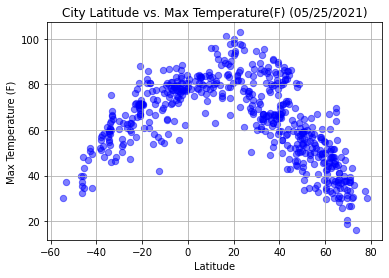

In [22]:
date = "05/25/2021"

x_values = cities_df_all["City Latitude"]
y_values = cities_df_all["City Max Temperature"]
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature(F) ({date})")
plt.scatter(x_values, y_values, marker = "o", s = 40, c = "blue", alpha = 0.50)
plt.grid()
plt.show()

The above chart is showing the Max Temperature for a particular city relative to it's latitude.  As a cities geographic location is closer to the equator (i.e. latitude -20 to 20), climates become much warmer. Conversely, as a cities geopraphic location are farther away from the equater, city climates become much cooler.  The sample size is ~500 plus cities.

## Latitude vs. Humidity Plot

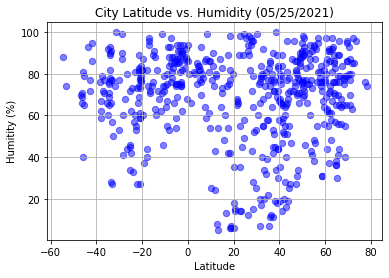

In [23]:
date = "05/25/2021"

x_values = cities_df_all["City Latitude"]
y_values = cities_df_all["City Humidity"]
plt.xlabel('Latitude')
plt.ylabel('Humitity (%)')
plt.title(f"City Latitude vs. Humidity ({date})")
plt.scatter(x_values, y_values, marker = "o", s = 40, c = "blue", alpha = 0.50)
plt.grid()
plt.show()

The above chart is showing the Humidity percentage for a particular city relative to it's latitude. The sample size is ~500 plus cities.

## Latitude vs. Cloudiness Plot

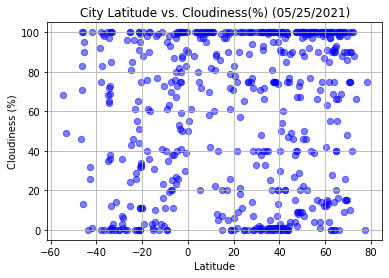

In [24]:
date = "05/25/2021"

x_values = cities_df_all["City Latitude"]
y_values = cities_df_all["City Cloudiness"]
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness(%) ({date})")
plt.scatter(x_values, y_values, marker = "o", s = 40, c = "blue", alpha = 0.50)
plt.grid()
plt.show()

The above chart is showing the Cloudiness (%) for a particular city relative to it's latitude.  The sample size is ~500 plus cities.

## Latitude vs. Wind Speed Plot

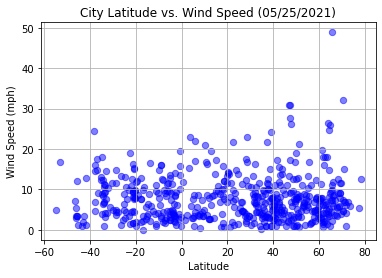

In [25]:
date = "05/25/2021"

x_values = cities_df_all["City Latitude"]
y_values = cities_df_all["City Wind Speed"]
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.scatter(x_values, y_values, marker = "o", s = 40, c = "blue", alpha = 0.50)
plt.grid()
plt.show()

The above chart is showing Wind Speed for a particular city relative to it's latitude. The sample size is ~500 plus cities.  Note: There is one outlier for a windspeed of 47 mph for Tasiilaq, Greenland - wind speeds have been up to 60 mph as of 05/25/2021.  

In [26]:
# To establish new preliminary DataFrames for plotting data in the Northern and Southern Hemispheres

# Northern Hemisphere
northern_df = city_data_df_all.loc[city_data_df_all["City Latitude"] >= 0]
northern_df.reset_index(inplace=True)
x_axis_north_df_latitude = northern_df["City Latitude"]
y_axis_north_temp_df = northern_df["City Max Temperature"]
y_axis_north_humidity_df = northern_df["City Humidity"]
y_axis_north_cloudiness_df = northern_df["City Cloudiness"]
y_axis_north_windspeed_df = northern_df["City Wind Speed"]

# Southeren Hemisphere
southern_df = city_data_df_all.loc[city_data_df_all["City Latitude"] < 0]
southern_df.reset_index(inplace=True)
x_axis_south_df_latitude = southern_df["City Latitude"]
y_axis_south_temp_df = southern_df["City Max Temperature"]
y_axis_south_humidity_df = southern_df["City Humidity"]
y_axis_south_cloudiness_df = southern_df["City Cloudiness"]
y_axis_south_windspeed_df = southern_df["City Wind Speed"]

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8101464752473758


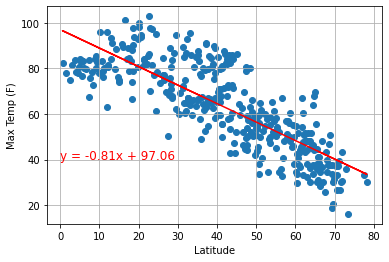

In [28]:
# scatter plot and linear regression   
plt.scatter(x_axis_north_df_latitude, y_axis_north_temp_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north_df_latitude, y_axis_north_temp_df)
regress_values = x_axis_north_df_latitude * slope + intercept
plt.plot(x_axis_north_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,40),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show() 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7932654931116596


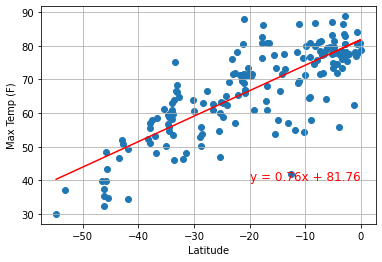

In [29]:
# scatter plot and linear regression   
plt.scatter(x_axis_south_df_latitude, y_axis_south_temp_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south_df_latitude, y_axis_south_temp_df)
regress_values = x_axis_south_df_latitude * slope + intercept
plt.plot(x_axis_south_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-20,40),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show() 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16114424502798558


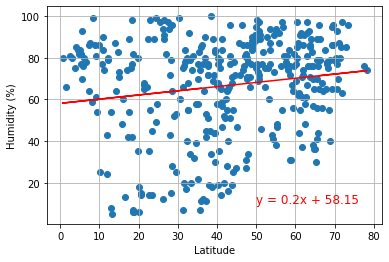

In [31]:
# scatter plot and linear regression   
plt.scatter(x_axis_north_df_latitude, y_axis_north_humidity_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north_df_latitude, y_axis_north_humidity_df)
regress_values = x_axis_north_df_latitude * slope + intercept
plt.plot(x_axis_north_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,10),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show() 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.22266088880463397


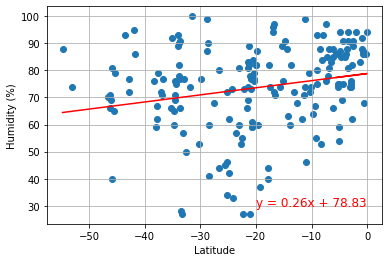

In [49]:
# scatter plot and linear regression   
plt.scatter(x_axis_south_df_latitude, y_axis_south_humidity_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south_df_latitude, y_axis_south_humidity_df)
regress_values = x_axis_south_df_latitude * slope + intercept
plt.plot(x_axis_south_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-20,30),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show() 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02812250114912611


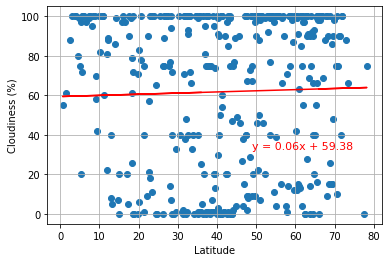

In [47]:
# scatter plot and linear regression   
plt.scatter(x_axis_north_df_latitude, y_axis_north_cloudiness_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north_df_latitude, y_axis_north_cloudiness_df)
regress_values = x_axis_north_df_latitude * slope + intercept
plt.plot(x_axis_north_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(49,33),fontsize=11,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10297091026957789


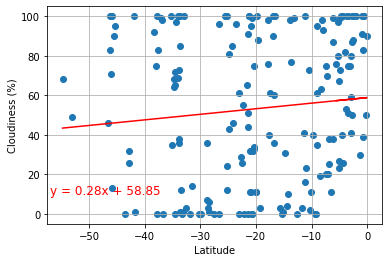

In [35]:
# scatter plot and linear regression   
plt.scatter(x_axis_south_df_latitude, y_axis_south_cloudiness_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south_df_latitude, y_axis_south_cloudiness_df)
regress_values = x_axis_south_df_latitude * slope + intercept
plt.plot(x_axis_south_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-57,10),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.010820280281947692


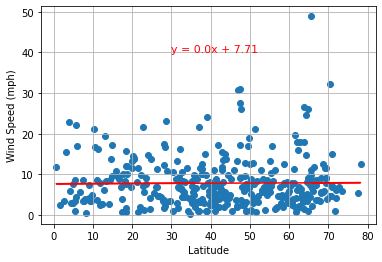

In [40]:
# scatter plot and linear regression   
plt.scatter(x_axis_north_df_latitude, y_axis_north_windspeed_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_north_df_latitude, y_axis_north_windspeed_df)
regress_values = x_axis_north_df_latitude * slope + intercept
plt.plot(x_axis_north_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(30,40),fontsize=11,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.09383278985438949


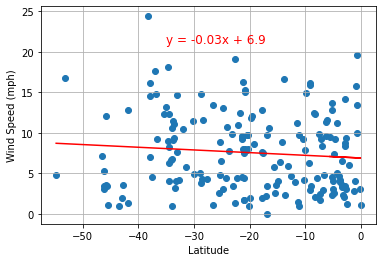

In [43]:
# scatter plot and linear regression   
plt.scatter(x_axis_south_df_latitude, y_axis_south_windspeed_df)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_south_df_latitude, y_axis_south_windspeed_df)
regress_values = x_axis_south_df_latitude * slope + intercept
plt.plot(x_axis_south_df_latitude, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid() 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-35,21),fontsize=12,color="red")
plt.title(print(f"The r-value is: {rvalue}"))
plt.show()